In [1]:
# from clustering_imports import *
from clustering_driver import *

## Cluster the reference data

In [1]:
!./clustering_driver.py build -i ~/images_from_structures.npy -o models_k3_R30_C45
!./clustering_driver.py build -i ~/images_from_structures.npy -C 25 -o models_k3_R30_C25
!./clustering_driver.py build -i ~/images_from_structures.npy -C 10 -o models_k3_R30_C10
!ls models*

Loaded Array:
(256, 128, 128)
2023-09-06 21:50:53.001 | INFO     | __main__:hierarchify:267 - 256,16384,3,30,45,1.718818025001383,0.0381695799951558
Building hierarchical clustering
Loaded Array:
(256, 128, 128)
2023-09-06 21:50:55.066 | INFO     | __main__:hierarchify:267 - 256,16384,3,30,25,1.1962385160004487,0.017501815003925003
Building hierarchical clustering
Loaded Array:
(256, 128, 128)
2023-09-06 21:50:59.478 | INFO     | __main__:hierarchify:267 - 256,16384,3,30,10,3.521565378003288,0.013330167996173259
Building hierarchical clustering
models_k3_R30_C10_tree_data_list.npy   models_k3_R30_C25_tree_node_vals.npy
models_k3_R30_C10_tree_hierarchy.json  models_k3_R30_C45_tree_data_list.npy
models_k3_R30_C10_tree_node_vals.npy   models_k3_R30_C45_tree_hierarchy.json
models_k3_R30_C25_tree_data_list.npy   models_k3_R30_C45_tree_node_vals.npy
models_k3_R30_C25_tree_hierarchy.json


In [9]:
# !./clustering_driver.py load -t models_tree_hierarchy.json -G
# !ls *.graphml

Loading hierarchical clustering
256
tree_representation.graphml


## Perform Likelihood calculation

In [3]:
!./clustering_driver.py likelihood --models models_k3_R30_C45_tree_hierarchy.json --images ~/images_experimental.npy -T

# ~/stuff/cryoem/Ensemble-reweighting-using-Cryo-EM-particles/processed_images/images_experimental.npy

Loaded Array:
(2048, 128, 128)
2023-09-06 21:54:52.774 | INFO     | likelihood_scratch:evaluate_tree_neighbor_likelihood:80 - tree_match_likelihood time: 2.315563108997594
2023-09-06 21:54:54.985 | INFO     | likelihood_scratch:evaluate_tree_cluster_likelihood:113 - tree_cluster_likelihood time: 2.207333237005514
2023-09-06 21:54:54.987 | INFO     | likelihood_scratch:search_tree_likelihoods:150 - lambda: 0.8518240348090615
2023-09-06 21:55:12.768 | INFO     | likelihood_scratch:evaluate_global_neighbor_likelihood:181 - global_neighbor_likelihood time: 17.54785095900297
2023-09-06 21:55:31.321 | INFO     | likelihood_scratch:evaluate_global_likelihood:206 - global_likelihood time: 18.550555030000396
2023-09-06 21:55:31.323 | INFO     | likelihood_scratch:global_scope_likelihoods:226 - lambda: 0.8518240348090615


## Generate Histograms

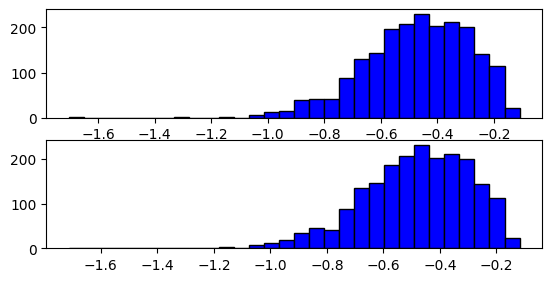

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load data from CSV files
search_tree_likelihoods = pd.read_csv("search_tree_likelihoods.csv")
global_likelihoods = pd.read_csv("all_pairs_likelihoods.csv")

# Extract single point likelihood and area likelihood data
single_point_likelihoods = np.array(search_tree_likelihoods["single_point_likelihood"])
area_likelihoods = np.array(global_likelihoods["area_likelihood"])

# Calculate the average of single point likelihoods and area likelihoods
spl_average = np.mean(single_point_likelihoods)
al_average = np.mean(area_likelihoods)

# Calculate the standard deviation of single point likelihoods and area likelihoods
def calculate_std_dev(arr, avg):
    return np.sqrt(np.divide(np.sum(np.array([np.square(x - avg) for x in arr])), arr.shape[0] - 1))

spl_std_dev = calculate_std_dev(single_point_likelihoods, spl_average)
al_std_dev = calculate_std_dev(area_likelihoods, al_average)

# Calculate bin widths using Scott's rule
def calculate_bin_width(arr, std_dev):
    return 3.5 * std_dev / (arr.shape[0] ** (1/3))

spl_bin_width = calculate_bin_width(single_point_likelihoods, spl_std_dev)
al_bin_width = calculate_bin_width(area_likelihoods, al_std_dev)

# Calculate the number of bins
def calculate_bin_count(arr, bin_width):
    return int((max(arr) - min(arr)) / bin_width)

spl_bin_count = calculate_bin_count(single_point_likelihoods, spl_bin_width)
al_bin_count = calculate_bin_count(area_likelihoods, al_bin_width)

# Create subplots and histograms
plt.subplot(3, 1, 1)
plt.hist(single_point_likelihoods, bins=spl_bin_count, color='blue', edgecolor='black')

plt.subplot(3, 1, 2)
plt.hist(area_likelihoods, bins=al_bin_count, color='blue', edgecolor='black')

plt.show()


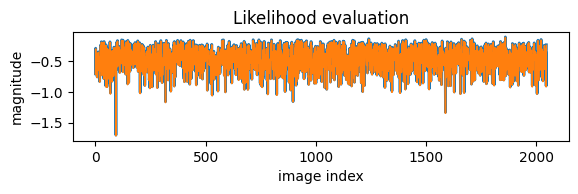

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error

search_tree = pd.read_csv("search_tree_likelihoods.csv")
global_likelihood = pd.read_csv("all_pairs_likelihoods.csv")

t = [i for i in range(len(search_tree["single_point_likelihood"]))]
plt.subplot(3, 1, 3)
plt.plot(t, search_tree["single_point_likelihood"], linewidth=2)
plt.plot(t, global_likelihood["area_likelihood"], linewidth=1.1)
plt.xlabel("image index")
plt.ylabel("magnitude")
plt.title("Likelihood evaluation")
plt.show()

In [12]:
!./clustering_driver.py search -t models_tree_hierarchy.json -M ~/images_from_structures.npy -G

256
Loaded Array:
(256, 128, 128)
Searching hierarchical clustering
2023-09-06 16:38:31.048 | INFO     | __main__:search_tree_associations:87 - 0.237280153996835
2023-09-06 16:38:33.685 | INFO     | __main__:all_pairs_associations:130 - 2.6368587920005666
